In [23]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [24]:
# Loading and examining the dataset
df = pd.read_csv("/content/Airline Passenger.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Cleansing Data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [26]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [27]:
df.dropna(inplace=True)

In [28]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Created new dataframe 'Type of travel' & 'Class'

In [29]:
selected_columns = ['Type of Travel', 'Class']
X = df[selected_columns]
y = df['satisfaction']

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Type of Travel  103594 non-null  object
 1   Class           103594 non-null  object
dtypes: object(2)
memory usage: 2.4+ MB


In [31]:
X.head()

,Type of Travel,Class
0,Personal Travel,Eco Plus
1,Business travel,Business
2,Business travel,Business
3,Business travel,Business
4,Business travel,Business


Karena tipe data dari kedua kolom diatas masih bertipekan 'object', kita akan mengubahnya menjadi angka.

Type of Travel :
Personal Travel = 0
Business Travel = 1

Class :
Eco = 0,
Eco Plus = 0.1,
Bussiness = 1

In [32]:
X['Type of Travel'].replace(['Personal Travel','Business travel'], [0,1], inplace=True)
X['Class'].replace(['Eco', 'Eco Plus', 'Business'], [0,0.1,1], inplace=True)

<ipython-input-32-282e78e299b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Type of Travel'].replace(['Personal Travel','Business travel'], [0,1], inplace=True)
<ipython-input-32-282e78e299b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Class'].replace(['Eco', 'Eco Plus', 'Business'], [0,0.1,1], inplace=True)


In [33]:
X.head()

,Type of Travel,Class
0,0,0.1
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0


Scalling

In [34]:
cols = X.columns

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [37]:
X = pd.DataFrame(X, columns=[cols])

In [38]:
X.head()

,Type of Travel,Class
0,0.0,0.1
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


K-Means Clustering

In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

label_2 = kmeans.fit_predict(X)

Inertia

In [44]:
kmeans.inertia_

15474.45785159499

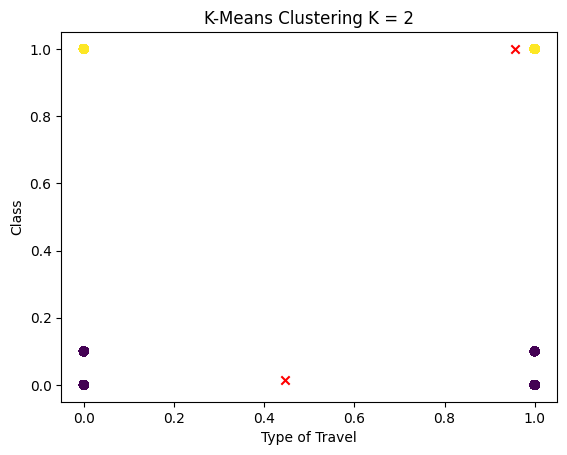

In [46]:
plt.scatter(X['Type of Travel'], X['Class'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')
plt.xlabel('Type of Travel')
plt.ylabel('Class')
plt.title('K-Means Clustering K = 2')
plt.show()

Elbow Method

<ipython-input-47-915cd2302914>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-47-915cd2302914>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-47-915cd2302914>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-47-915cd2302914>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-47-915cd2302914>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-47-915cd2302914>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clust

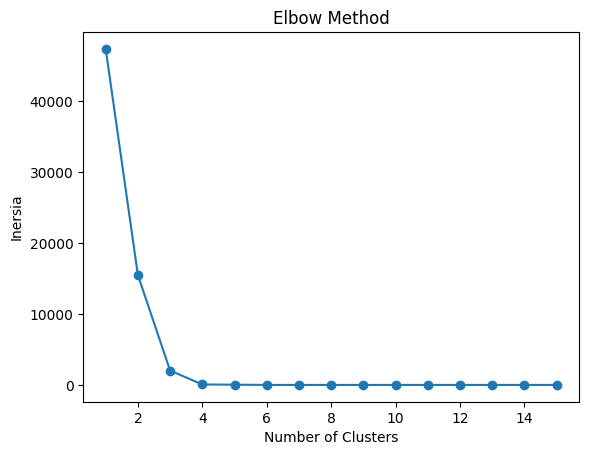

In [47]:
inertia = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 16), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inersia')
plt.title('Elbow Method')
plt.show()

Trying K=3

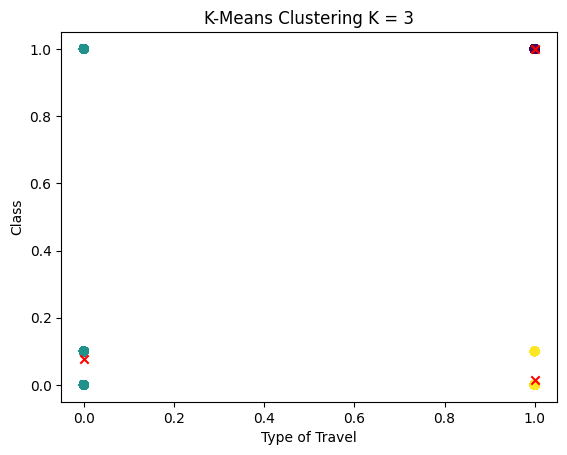

In [49]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

label_4 = kmeans.fit_predict(X)

plt.scatter(X['Type of Travel'], X['Class'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')
plt.xlabel('Type of Travel')
plt.ylabel('Class')
plt.title('K-Means Clustering K = 3')
plt.show()

Silhouette Score

In [55]:

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Melakukan clustering dengan jumlah cluster yang telah ditentukan
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
cluster_labels = kmeans.labels_

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)
precentage = "{:.0f}%".format(silhouette_avg * 100)

print("Silhouette Score:", silhouette_avg)
print("Silhouette Precentage", precentage)

Silhouette Score: 0.9494614099315745
Silhouette Precentage 95%
